In [1]:
%matplotlib inline
from math import log, e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_theme()

destDatasetPath = "../dataset/users_clean_with_indicators_with_outliers.h5"

In [2]:
%%time
dataseUsersCleanedPath = "../dataset/users_clean_with_outliers.h5"
df_users = pd.read_hdf(dataseUsersCleanedPath)

CPU times: user 167 ms, sys: 15.1 ms, total: 182 ms
Wall time: 202 ms


In [3]:
%%time
datasetTweetsCleanedPath = "../dataset/tweets_clean_with_outliers.h5"
df_tweets = pd.read_hdf(datasetTweetsCleanedPath)

CPU times: user 5.36 s, sys: 5.97 s, total: 11.3 s
Wall time: 11.8 s


In [4]:
df_tweets.duplicated().sum()

0

/tmp/ipykernel_13564/3814561212.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_tweets.corr()


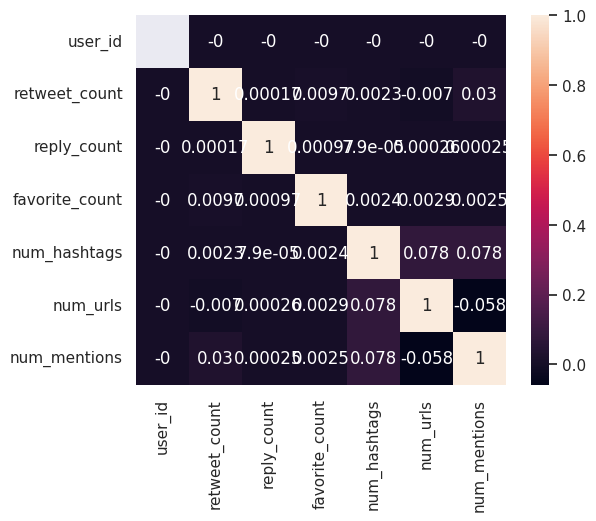

In [5]:
corr_matrix = df_tweets.corr()
fig, ax = plt.subplots()
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

## Tweet_length

In [6]:
df_tweets["tweet_length"] = df_tweets["text"].apply(lambda x: len(x))

In [7]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42
...,...,...,...,...,...,...,...,...,...,...
11712083,2.272612e+09,1,0,3,0,0,0,2019-01-27 16:01:54,c'ã¨ un momento in cui sentire ed ascoltare si...,126
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48


In [8]:
def count_special_characters(text):
    counter = 0
   
    for i in range(0, len(text)):
        if (not (text[i].isalpha() or text[i].isdigit()) and text[i] != ' '):
            counter += 1
    
    return counter

## num_special_chars

In [9]:
df_tweets["num_special_chars"] = df_tweets["text"].apply(count_special_characters)

In [10]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length,num_special_chars
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64,2
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101,14
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19,1
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85,2
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42,4
...,...,...,...,...,...,...,...,...,...,...,...
11712083,2.272612e+09,1,0,3,0,0,0,2019-01-27 16:01:54,c'ã¨ un momento in cui sentire ed ascoltare si...,126,5
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19,3
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118,5
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48,2


#### tweets_count: how many tweets were published by the user

In [11]:
df_counts = df_tweets.user_id.value_counts().to_frame("tweet_count")
df_counts

,tweet_count
-1.000000e+00,213713
4.916306e+08,3926
1.693275e+09,3906
1.570298e+08,3901
7.004532e+06,3897
...,...
1.110000e+02,1
5.512000e+03,1
1.410000e+02,1
1.373570e+09,1


In [12]:
df_users = df_users.merge(df_counts, how="inner", left_index=True, right_index=True)
df_users

,name,lang,bot,created_at,statuses_count,tweet_count
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,120
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54.0,104
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50.0,1275
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3277
...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1017
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024.0,1888
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,96


In [13]:
count_peruser = df_tweets.groupby(["user_id"]).sum()
count_peruser

/tmp/ipykernel_13564/3974280124.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count_peruser = df_tweets.groupby(["user_id"]).sum()


,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_length,num_special_chars
user_id,,,,,,,,
-1.000000e+00,96712367,200931,1188367,31965,30259,93679,15724789,1110876
0.000000e+00,93,0,1,0,0,1,296,25
2.000000e+00,0,0,0,0,0,0,66,9
3.000000e+00,0,0,0,0,0,3,67,8
5.000000e+00,0,0,0,0,0,0,192,6
...,...,...,...,...,...,...,...,...
4.800000e+64,0,0,0,0,0,0,20,5
3.300000e+66,0,0,0,0,0,0,0,0
4.000000e+95,1,0,0,0,0,0,0,0


In [14]:
def add_avg_column(df, attr_count, attr, ):
    newColumnTitle = attr+"_avg"
    df[newColumnTitle] = attr_count[attr] / df["tweet_count"]

In [15]:
add_avg_column(df_users, count_peruser, "retweet_count")
add_avg_column(df_users, count_peruser, "reply_count")
add_avg_column(df_users, count_peruser, "favorite_count")
add_avg_column(df_users, count_peruser, "num_hashtags")
add_avg_column(df_users, count_peruser, "num_urls")
add_avg_column(df_users, count_peruser, "num_mentions")
add_avg_column(df_users, count_peruser, "tweet_length")
add_avg_column(df_users, count_peruser, "num_special_chars")
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,120,0.033333,0.0,0.041667,0.108333,0.000000,0.291667,62.366667,3.958333
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54.0,104,0.028846,0.0,0.057692,0.028846,0.000000,0.365385,69.961538,3.615385
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,17.333333,4.333333
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50.0,1275,0.928627,0.0,0.189020,0.083137,0.025098,0.007059,88.509804,4.814118
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3277,0.018004,0.0,0.064693,0.131523,0.000915,0.526396,73.673482,3.671651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1017,5956.190757,0.0,0.060964,0.216323,0.027532,0.773845,53.143559,5.085546
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024.0,1888,416.528602,0.0,0.227225,0.129767,0.099576,0.547669,60.895127,4.360699
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,0.666667,0.333333,67.666667,6.666667
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,96,0.072917,0.0,0.083333,0.010417,0.000000,0.395833,64.572917,3.979167


In [16]:
df_users.describe()

,bot,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5750.093500,890.569604,367.427349,0.387964,17.336149,0.157817,0.091054,0.363099,69.431035,5.624068
std,0.499031,18752.596595,1163.881299,2202.850830,8.208510,325.745417,0.231653,0.181418,0.367852,16.491180,5.605126
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,42.000000,60.750000,0.025316,0.000000,0.024835,0.051546,0.000000,0.011145,60.769032,3.727247
50%,1.000000,71.000000,123.000000,0.111111,0.000000,0.066667,0.087585,0.018420,0.322034,66.705720,4.510450
75%,1.000000,2520.250000,1622.250000,120.832188,0.000000,0.275772,0.173913,0.079594,0.532215,78.743056,5.722263
max,1.000000,399555.000000,3926.000000,63995.214286,663.813559,12311.636364,6.419856,2.000000,5.796460,245.000000,145.500000


In [17]:
df_users = df_users.merge(count_peruser, how="inner", left_index=True, right_index=True)
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,...,tweet_length_avg,num_special_chars_avg,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_length,num_special_chars
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,120,0.033333,0.0,0.041667,0.108333,...,62.366667,3.958333,4,0,5,13,0,35,7484,475
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54.0,104,0.028846,0.0,0.057692,0.028846,...,69.961538,3.615385,3,0,6,3,0,38,7276,376
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,...,17.333333,4.333333,0,0,0,0,0,0,52,13
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50.0,1275,0.928627,0.0,0.189020,0.083137,...,88.509804,4.814118,1184,0,241,106,32,9,112850,6138
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3277,0.018004,0.0,0.064693,0.131523,...,73.673482,3.671651,59,0,212,431,3,1725,241428,12032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1017,5956.190757,0.0,0.060964,0.216323,...,53.143559,5.085546,6057446,0,62,220,28,787,54047,5172
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024.0,1888,416.528602,0.0,0.227225,0.129767,...,60.895127,4.360699,786406,0,429,245,188,1034,114970,8233
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,...,67.666667,6.666667,0,0,0,2,4,2,406,40
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,96,0.072917,0.0,0.083333,0.010417,...,64.572917,3.979167,7,0,8,1,0,38,6199,382


In [18]:
def entropy(values, base=None):
  n_values = len(values)

  if n_values <= 1:
    return 0

  value,counts = np.unique(values, return_counts=True)
  probs = counts / n_values
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

In [19]:
userGroup = df_tweets.groupby(["user_id"])["created_at"].apply(list)
userGroup

user_id
-1.000000e+00     [2019-10-02 17:25:04, 2019-09-25 22:43:31, 201...
 0.000000e+00     [2020-02-10 04:50:39, 2020-03-29 19:22:57, 201...
 2.000000e+00            [2020-04-26 21:56:13, 2020-01-20 16:37:22]
 3.000000e+00     [2019-06-09 18:33:57, 2014-01-19 00:53:07, 201...
 5.000000e+00            [2020-01-13 14:24:44, 2019-06-23 14:29:07]
                                        ...                        
 4.800000e+64                                 [2017-06-24 22:48:10]
 3.300000e+66                                 [2019-04-29 22:30:06]
 4.000000e+95                                 [2020-04-03 04:33:23]
 7.000000e+161                                [2020-01-06 14:59:53]
 3.000000e+296                                [2020-04-12 21:50:30]
Name: created_at, Length: 12142, dtype: object

In [20]:
# sort each created_at
for id in userGroup.index:
    userGroup.loc[id].sort()

In [21]:
elapsedHoursForUser = userGroup.copy()

for id in userGroup.index: # for each user id
    createdAtList = userGroup.loc[id] # list of the sorted created_at values of the user
    numberOfCreatedAt = len(createdAtList)
    
    # init the array of the elapsed milliseconds to zeroes
    elapsedHoursForUser.loc[id] = np.zeros(numberOfCreatedAt - 1)
    
    for i in range(numberOfCreatedAt - 1): # for each created at
        # elapsed time between this tweet and the next one. In milliseconds
        elapsedHours = (createdAtList[i+1] - createdAtList[i]).total_seconds() / 3600
        # update the list of the elapsed times for the current user
        elapsedHoursForUser.loc[id][i] = round(elapsedHours, 1)

In [22]:
elapsedHoursForUser

user_id
-1.000000e+00     [36.2, 82.2, 165.5, 116.6, 145.4, 8.4, 1.6, 93...
 0.000000e+00                  [464.7, 2783.3, 996.4, 170.1, 394.4]
 2.000000e+00                                              [2333.3]
 3.000000e+00                                     [38027.8, 9197.9]
 5.000000e+00                                              [4895.9]
                                        ...                        
 4.800000e+64                                                    []
 3.300000e+66                                                    []
 4.000000e+95                                                    []
 7.000000e+161                                                   []
 3.000000e+296                                                   []
Name: created_at, Length: 12142, dtype: object

In [23]:
totalTweets = 0
totalUsers = 0
for id in elapsedHoursForUser.index:
    elapsedList = elapsedHoursForUser.loc[id]
    if (len(elapsedList) == 0):
        continue
    noZero = False
    for elemIndex in range(len(elapsedList)):
        if (elapsedList[elemIndex] != 0.0):
            noZero = True
    if (noZero == False):
        print(id)
        totalTweets += len(df_tweets[df_tweets.user_id == id])
        totalUsers += 1

print(totalUsers, "users have done tweets at the same moment, for a total of", totalTweets)

78468090.0
154029272.0
169474438.0
170144297.0
178366319.0
216039493.0
254618989.0
490960729.0
555263333.0
1208259276.0
1218031976.0
1382419244.0
1387393236.0
1391378610.0
14 users have done tweets at the same moment, for a total of 33


In [24]:
elapsedTimeEntropyForUser = elapsedHoursForUser.copy()
for id in elapsedHoursForUser.index: # for each user id
    elapsedList = elapsedHoursForUser.loc[id] # list of the elapsed times of the user
    
    # init the array of the elapsed milliseconds to -1
    elapsedTimeEntropyForUser.loc[id] = entropy(elapsedList)

In [25]:
elapsedTimeEntropyForUser.describe()

count     12142.0
unique     6807.0
top           0.0
freq        814.0
Name: created_at, dtype: float64

In [26]:
elapsedTimeEntropyForUser.isna().sum()

0

In [27]:
new_column_name = "elapsed_time_entropy"
elapsed_time_entropy = elapsedHoursForUser.apply(entropy).to_frame(new_column_name)

In [28]:
elapsed_time_entropy

,elapsed_time_entropy
user_id,
-1.000000e+00,1.290660
0.000000e+00,1.609438
2.000000e+00,0.000000
3.000000e+00,0.693147
5.000000e+00,0.000000
...,...
4.800000e+64,0.000000
3.300000e+66,0.000000
4.000000e+95,0.000000


In [29]:
df_users = df_users.merge(elapsed_time_entropy, how="inner", left_index=True, right_index=True)

In [30]:
onlyOneTweet = df_users[df_users.tweet_count == 1]
total = 0
for i in onlyOneTweet.index:
    total += len(df_tweets[df_tweets.user_id == i])

print(total)

113


In [31]:
df_users.dtypes

name                             object
lang                             object
bot                               int64
created_at               datetime64[ns]
statuses_count                  float64
tweet_count                       int64
retweet_count_avg               float64
reply_count_avg                 float64
favorite_count_avg              float64
num_hashtags_avg                float64
num_urls_avg                    float64
num_mentions_avg                float64
tweet_length_avg                float64
num_special_chars_avg           float64
retweet_count                     int64
reply_count                       int64
favorite_count                    int64
num_hashtags                      int64
num_urls                          int64
num_mentions                      int64
tweet_length                      int64
num_special_chars                 int64
elapsed_time_entropy            float64
dtype: object

In [32]:
df_tweets.dtypes

user_id                     float64
retweet_count                 int64
reply_count                   int64
favorite_count                int64
num_hashtags                  int64
num_urls                      int64
num_mentions                  int64
created_at           datetime64[ns]
text                         object
tweet_length                  int64
num_special_chars             int64
dtype: object

In [33]:
def compute_entropy(tweets, column):
    new_column_name = column+"_entropy"
    new_column = tweets.groupby(['user_id'])[column].apply(entropy).to_frame(new_column_name)
    new_column.fillna(0, inplace=True)
    return df_users.merge(new_column, how="inner", left_index=True, right_index=True)

In [35]:
df_users = compute_entropy(df_tweets, "retweet_count")
df_users = compute_entropy(df_tweets, "reply_count")
df_users = compute_entropy(df_tweets, "favorite_count")
df_users = compute_entropy(df_tweets, "num_hashtags")
df_users = compute_entropy(df_tweets, "num_urls")
df_users = compute_entropy(df_tweets, "num_mentions")
df_users = compute_entropy(df_tweets, "tweet_length")
df_users = compute_entropy(df_tweets, "num_special_chars")
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,...,num_special_chars,elapsed_time_entropy,retweet_count_entropy,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_urls_entropy,num_mentions_entropy,tweet_length_entropy,num_special_chars_entropy
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,120,0.033333,0.0,0.041667,0.108333,...,475,1.364257,0.146145,0.0,0.173205,0.304947,0.000000,0.603637,4.274598,2.197449
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54.0,104,0.028846,0.0,0.057692,0.028846,...,376,1.335474,0.130708,0.0,0.220570,0.130708,0.000000,0.656454,4.129301,2.198832
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,...,13,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.098612,1.098612
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50.0,1275,0.928627,0.0,0.189020,0.083137,...,6138,4.130876,0.286464,0.0,0.508540,0.252911,0.117266,0.036302,4.686233,2.533116
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3277,0.018004,0.0,0.064693,0.131523,...,12032,2.868727,0.089035,0.0,0.243648,0.402308,0.007320,0.873255,4.765100,2.091581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1017,5956.190757,0.0,0.060964,0.216323,...,5172,2.327531,2.432918,0.0,0.229384,0.546803,0.126738,1.086588,4.701245,2.551393
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024.0,1888,416.528602,0.0,0.227225,0.129767,...,8233,3.268229,0.901153,0.0,0.586425,0.395943,0.326282,0.964965,4.768169,2.447658
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,...,40,1.332179,0.000000,0.0,0.000000,0.636514,0.636514,0.636514,1.791759,1.791759
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,96,0.072917,0.0,0.083333,0.010417,...,382,1.256998,0.261952,0.0,0.286836,0.057908,0.000000,0.671286,4.120230,2.280762


## Correlation matrix

/tmp/ipykernel_13564/1083572097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_users.corr()


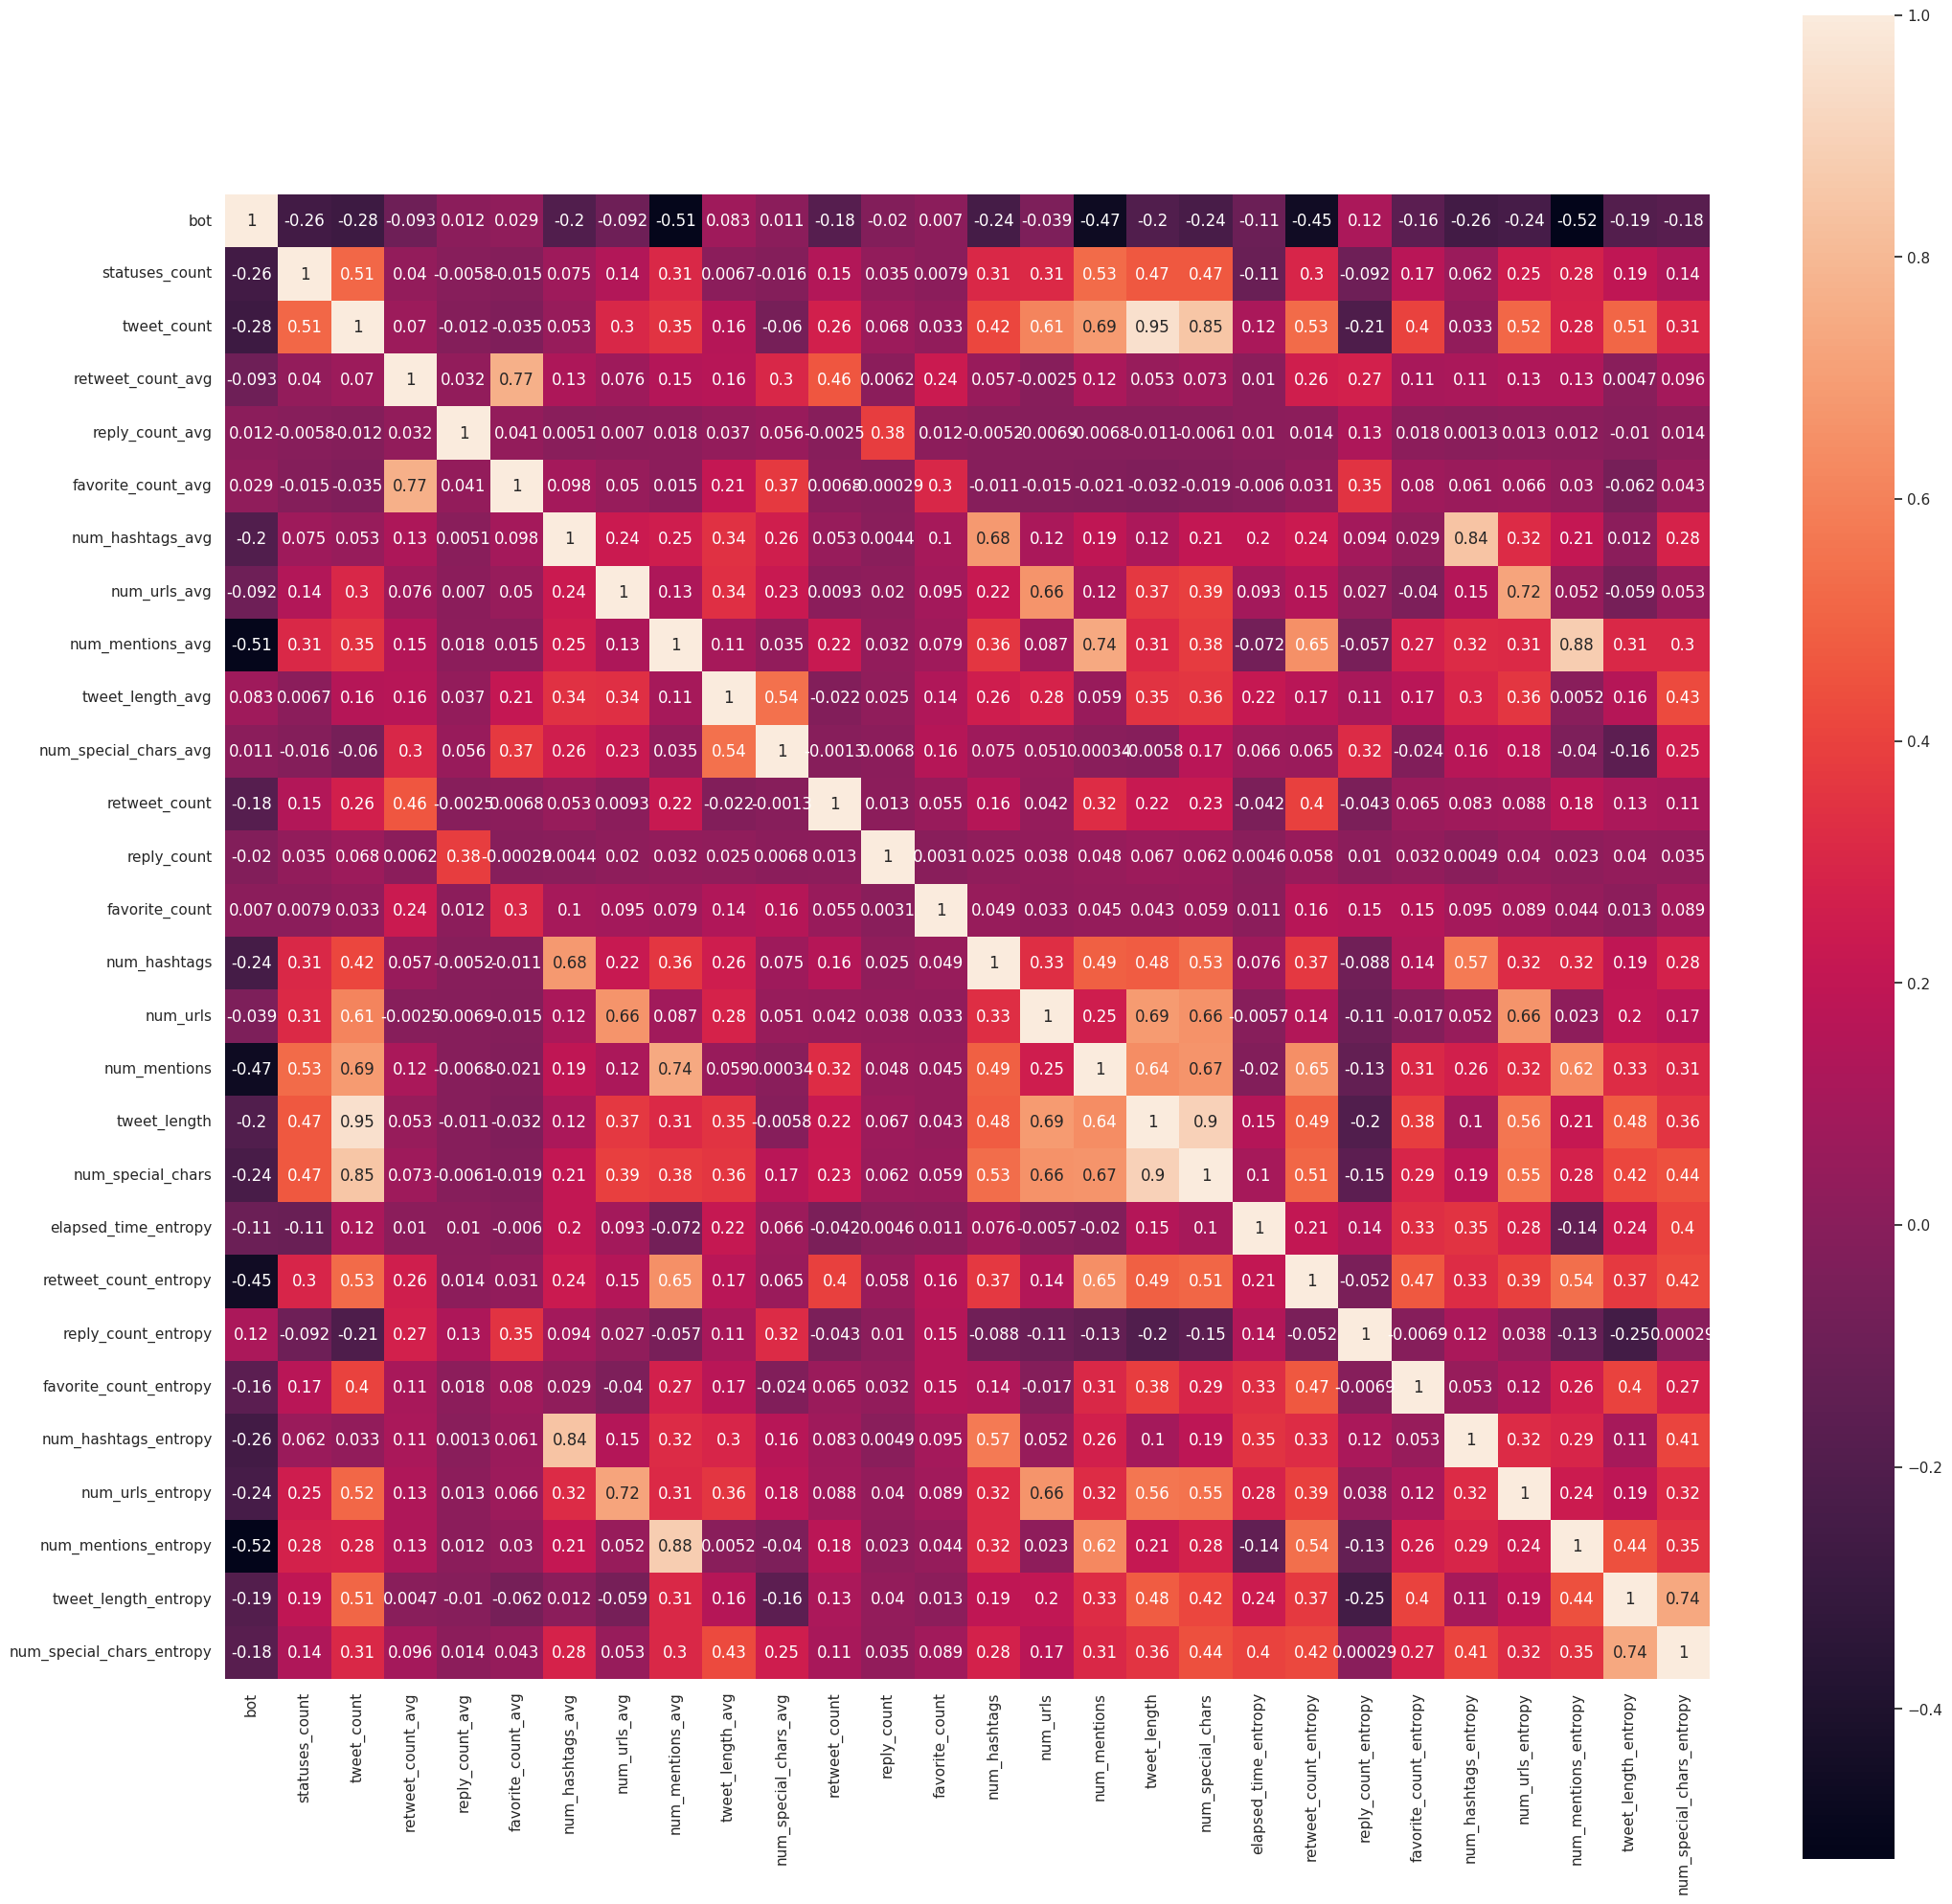

In [36]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

In [37]:
for i in range(27):
    for j in range(i):
        if abs(corr_matrix.iat[i, j]) > 0.8:
            print(corr_matrix.columns[i], " - ", corr_matrix.columns[j], " - ", corr_matrix.iat[i, j])

tweet_length  -  tweet_count  -  0.9538628110159593
num_special_chars  -  tweet_count  -  0.8458205469523574
num_special_chars  -  tweet_length  -  0.8976847984251419
num_hashtags_entropy  -  num_hashtags_avg  -  0.8420440327217591
num_mentions_entropy  -  num_mentions_avg  -  0.8767947240011044


In [29]:
del df_users["num_special_chars_entropy"]
del df_users["tweet_length_entropy"]
del df_users["tweet_length"]
del df_users["num_special_chars"]
del df_users["num_urls_entropy"]

# Save to file

In [30]:
df_users.to_hdf(destDatasetPath, 'df_users', mode='w')

c:\Users\Domenico\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\pytables.py:314: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->axis1] [items->None]

  f(store)


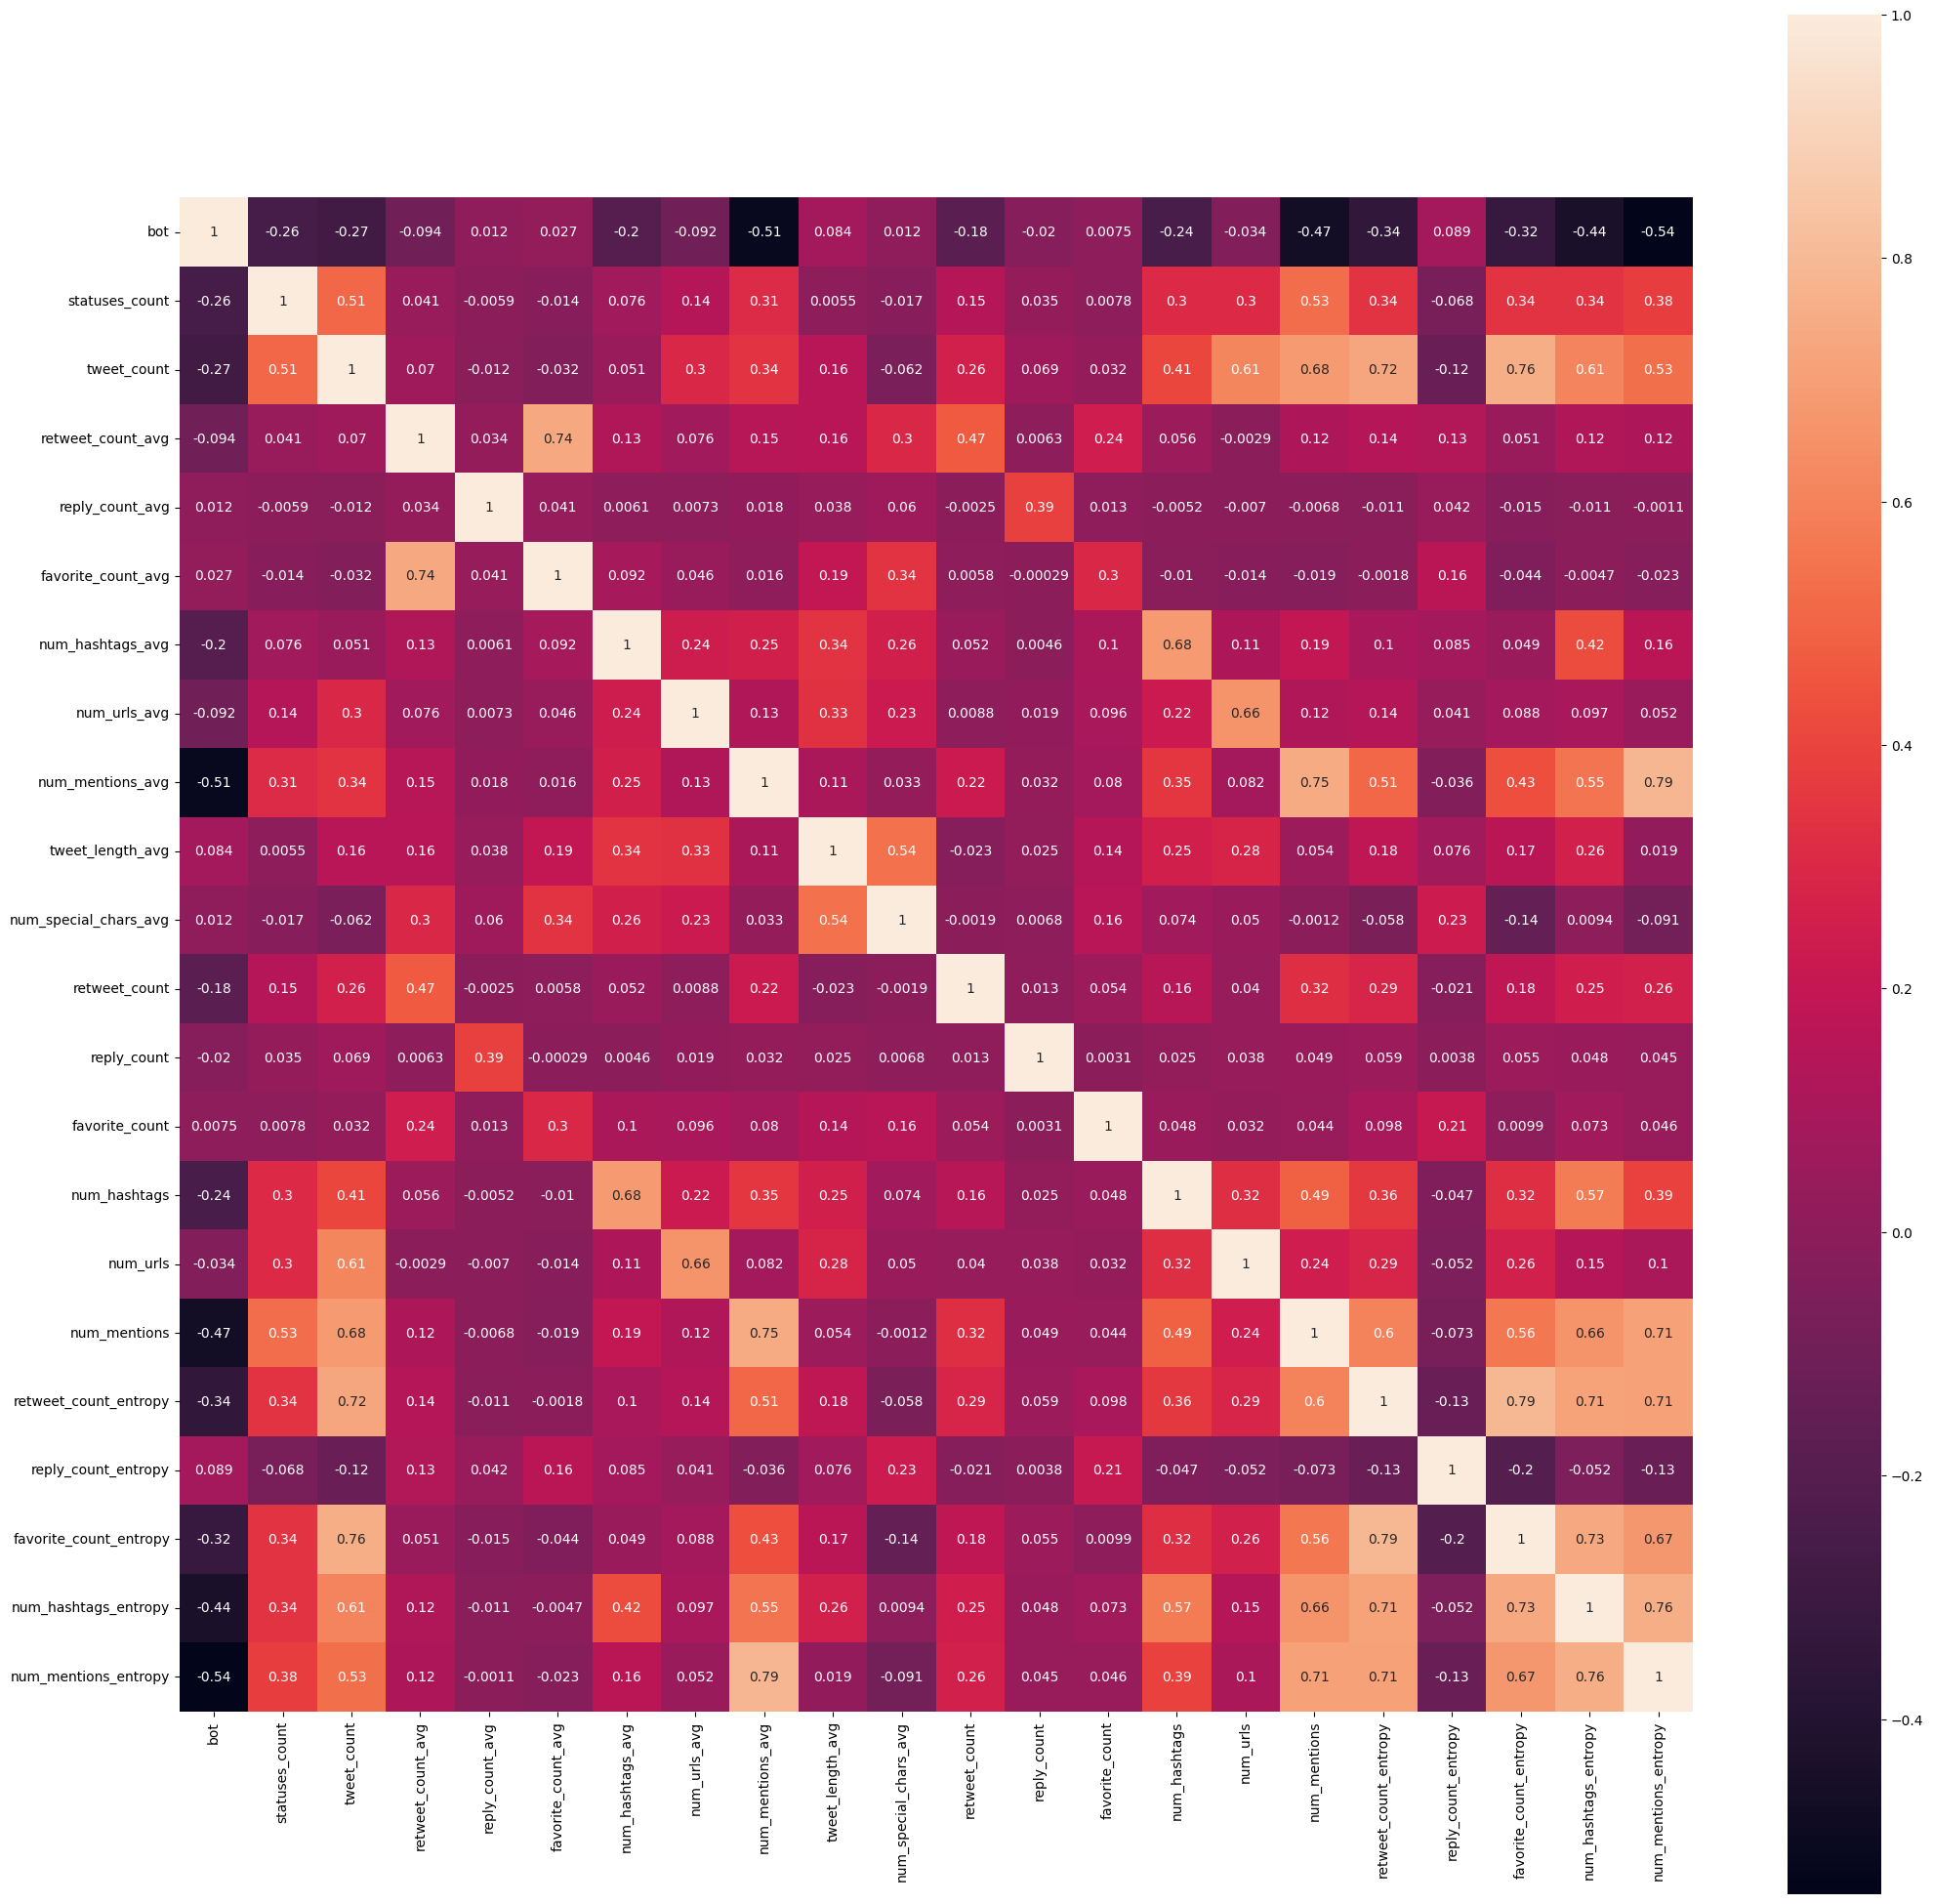

In [31]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.savefig("../images/correlation_matrix_with_new_indicators")
plt.show()

In [33]:
for i in range(22):
    for j in range(i):
        if abs(corr_matrix.iat[i, j]) > 0.8:
            print(corr_matrix.columns[i], " - ", corr_matrix.columns[j], " - ", corr_matrix.iat[i, j])